# 타이타닉 ML

## 외워야 하는 순서

### 불러오기 
info -> describe -> 결측치 확인 -> 범주형 데이터 숫자로(XGBoost, CatBoost는 이것도 해줌) -> 이상치데이터 처리 -> 데이터 분할 -> 스케일 작업(이거는 해주는 모델도 있음)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.impute import SimpleImputer

warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_raw = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('N')
df['Embarked'] = df['Embarked'].fillna('N')

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
df.drop(['Name','Ticket','PassengerId'],axis=1, inplace=True) # inplace= True -> 원본에 다시 덮어씌우라는 뜻
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,N,S


In [11]:
from sklearn.preprocessing import LabelEncoder

features = ['Sex','Cabin','Embarked']
for feature in features:
    le = LabelEncoder()
    le_result = le.fit(df[feature])
    df[feature] = le_result.transform(df[feature])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,146,3
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,146,3
3,1,1,0,35.0,1,0,53.1000,55,3
4,0,3,1,35.0,0,0,8.0500,146,3


In [12]:
df.describe() # 어떤 데이터가 연관성이 높은지, 데이터 불균형들을 체크하는 과정을 거쳐야 한다.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,129.974186,2.343434
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,35.677211,1.167398
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,146.000000,2.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,146.000000,3.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,146.000000,3.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,147.000000,3.000000


In [13]:
# 이상치 제거

# 데이터 불균형 확인

<Axes: xlabel='Sex', ylabel='Survived'>

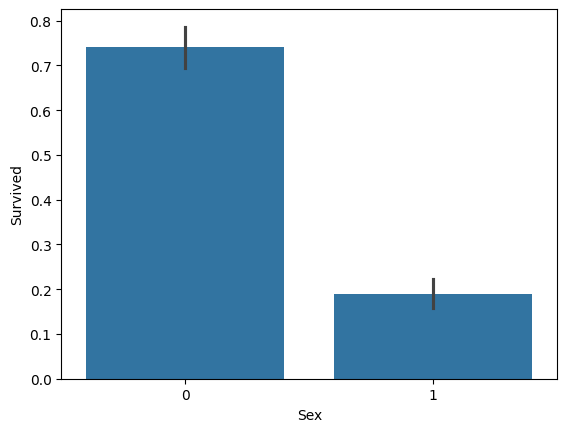

In [14]:
sns.barplot(x='Sex', y='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

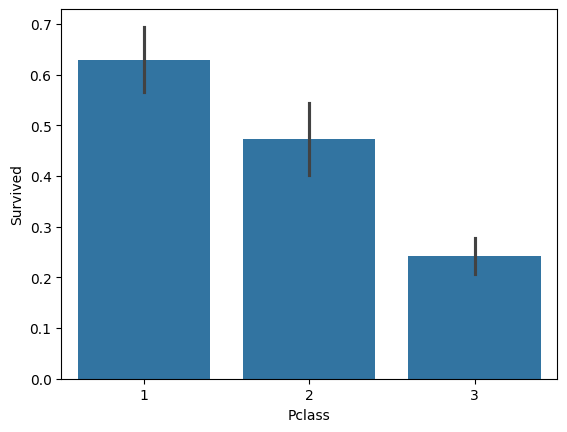

In [15]:
sns.barplot(x='Pclass', y='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

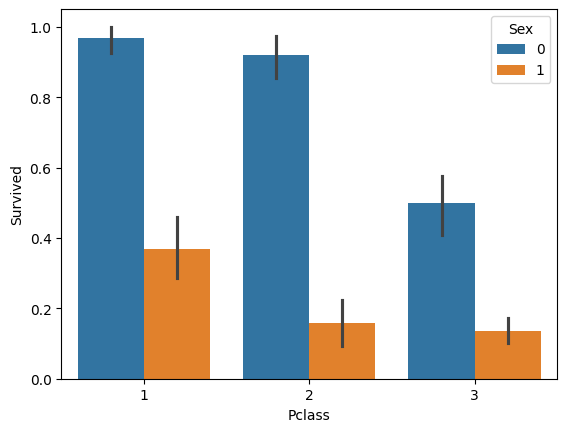

In [16]:
sns.barplot(x='Pclass', y='Survived',hue='Sex', data=df)

In [ ]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

y_data = df['Survived']
X_data = df.drop('Survived',axis=1) #정답값을 빼고 줘야함.

X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=42,stratify=y_data)

In [20]:
X_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,146,3
1,1,0,38.000000,1,0,71.2833,81,0
2,3,0,26.000000,0,0,7.9250,146,3
3,1,0,35.000000,1,0,53.1000,55,3
4,3,1,35.000000,0,0,8.0500,146,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,146,3
887,1,0,19.000000,0,0,30.0000,30,3
888,3,0,29.699118,1,2,23.4500,146,3
889,1,1,26.000000,0,0,30.0000,60,0


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
565,3,1,24.000000,2,0,24.1500,146,3
160,3,1,44.000000,0,1,16.1000,146,3
553,3,1,22.000000,0,0,7.2250,146,0
860,3,1,41.000000,2,0,14.1083,146,3
241,3,0,29.699118,1,0,15.5000,146,2
...,...,...,...,...,...,...,...,...
880,2,0,25.000000,0,1,26.0000,146,3
91,3,1,20.000000,0,0,7.8542,146,3
883,2,1,28.000000,0,0,10.5000,146,3
473,2,0,23.000000,0,0,13.7917,90,0


In [38]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()

dt_model.fit(X_train,y_train)
dt_result = dt_model.predict(X_test)
accuracy_score(dt_result,y_test)

0.7541899441340782

In [30]:
rf_model.fit(X_train,y_train)
rf_result = rf_model.predict(X_test)
accuracy_score(rf_result,y_test)

0.8044692737430168

In [39]:
lr_model.fit(X_train,y_train)
lr_result = lr_model.predict(X_test)
accuracy_score(lr_result,y_test)

0.8100558659217877